In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class linreg:
    def __init__(self, x, y): # Initialize class values
        self.x = x
        self.y = y
    
    def beta(self) -> float: # beta: B - Function to compute Beta using the formula
        n = len(self.x)
        avg_x = np.mean(self.x) # x üzeri _
        avg_y = np.mean(self.y)
        
        return (sum(list(xi*yi for xi,yi in zip(self.x, self.y)))-(n*avg_x*avg_y)) / (sum(list(xi**2 for xi in self.x))-(n*avg_x**2))

    def a(self, B: float) -> float: # Function to compute constant value a, using the formula. (Beta0)
        avg_x = np.mean(self.x)
        avg_y = np.mean(self.y)
        
        return (avg_y - (B * avg_x))
    
    def r2(self, y_pred, y_true): # y_pred = y_hat
        '''
        r2 = SSR/SST = 1 - sum((yi_hat-y_i)^2)/sum((yi-y_mean)^2)
        '''
        r2_score = 1 - (sum(pow((yi-yi_hat), 2) for yi, yi_hat in zip(y_true, y_pred)) / sum(pow((yi-np.mean(y_true)), 2) for yi in y_true))
        
        return r2_score
    
    def fit(self) -> list: # Training
        self.B = self.beta()
        self.const_a = self.a(self.B)
        
        return [f"beta: {self.B}, a: {self.const_a}"]
    
    def predict(self, x_test: list) -> list: # Prediction - Y = a + B*x
        return list(self.const_a + self.B*xi for xi in x_test)
            
    def error(self, actual = None, predicted = None):
        if actual == None or predicted == None:
            actual = self.y
            predicted = self.predict(self.x)
            
        mae = sum(abs(y_actual-y_pred) for y_actual, y_pred in zip(actual, predicted))/len(actual)
        mse = sum((y_actual-y_pred)**2 for y_actual, y_pred in zip(actual, predicted))/len(actual)
        rmse = (sum((y_actual-y_pred)**2 for y_actual, y_pred in zip(actual, predicted))/len(actual))**(1/2)
        
        print(f"Mean Absolute Error: {mae}\nMean Squared Error: {mse}\nRoot Mean Squared Error: {rmse}")
                             
    def visualize(self, x=None, y=None): # Visualization of scatter and plot graphics
        if x == None or y==None:
            x = self.x
            y = self.y
            
        fig, ax = plt.subplots(2, 2)
        fig.set_size_inches(10, 10)
        
        ax[0][0].hist(x)
        ax[0][0].set_title("Histogram Graphic for Independent Varaiable X")
        ax[0][0].set_xlabel("Count")
        ax[0][0].set_ylabel("Value")
        
        ax[0][1].boxplot(x)
        ax[0][1].set_title("Boxplot for Outlier Detection")
        
        ax[1][0].scatter(x, y)
        ax[1][0].set_title("Original Data Scatter Graphic")
        ax[1][0].set_xlabel("Array X")
        ax[1][0].set_ylabel("Array Y")
                
        ax[1][1].plot(x, self.predict(x), c='red')
        ax[1][1].scatter(x, y, alpha=0.5)
        ax[1][1].set_title("Overall Graphic with Predicted Line")
        ax[1][1].set_xlabel("X-Axis")
        ax[1][1].set_ylabel("Y-Axis")
        
        plt.show()

In [3]:
import pandas as pd

df = pd.read_excel("~/Downloads/slr06.xls", engine='xlrd')
df.head()

x = df['X']
Y = df['Y']

# x.dot(Y) # İki vektörün skalar çarpımı

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [4]:
upperbound = 135
lowerbound = -100.0 # Not important in this case

df.drop(df[(df.X > upperbound) | (df.X < lowerbound) ].index , inplace=True)

x = df['X']
Y = df['Y']

In [5]:
lr = linreg(x, Y) # Class instance
lr.fit() # Training

['beta: 3.4138235600663673, a: 19.994485759114795']

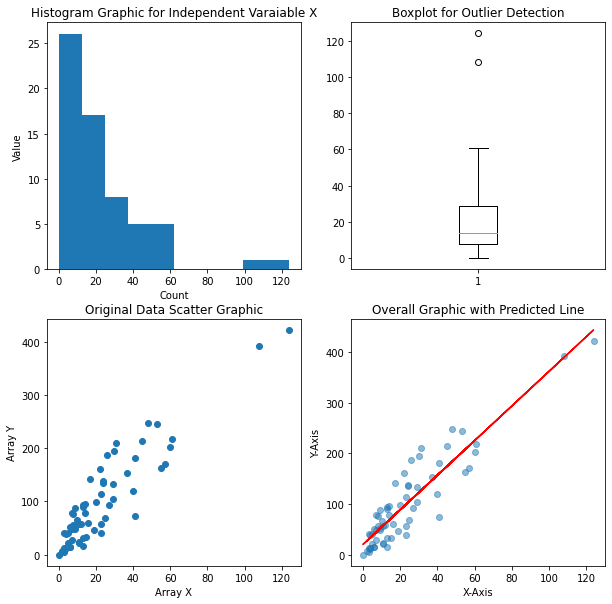

14.0

In [6]:
lr.visualize() # Graphical output of the training data
np.median(x) # Middle value of boxplot

In [7]:
lr.r2(lr.predict(x), Y)

0.8333466719794501

In [8]:
lr.error()

Mean Absolute Error: 28.475678125093765
Mean Squared Error: 1250.7419293814692
Root Mean Squared Error: 35.36582996879147
